# Analisa sentimen menggunakan algoritma logistic regression

In [2]:
import numpy as pd
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2train.csv')
df.head()

,label,tweet
0,1,rt @napqilla no ambisinya menguasai raky...
1,1,rt @pandji nah gue pikir sentimen petahana ok...
2,1,rt @pandji urutan pertama best moment #debat ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...
4,0,rt @mrtampi agus makin santai nahok makin sa...


In [8]:
y = df['label']
y[0:5]

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

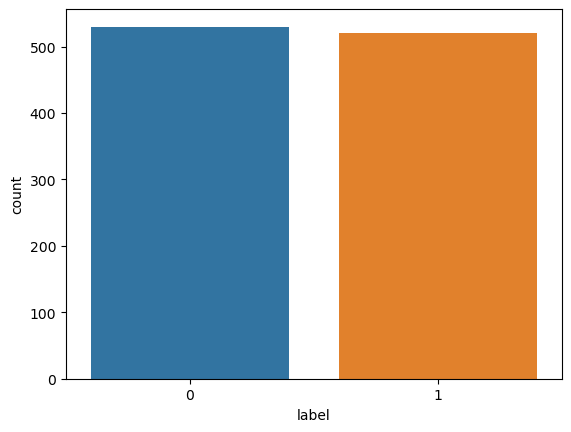

In [9]:
sns.countplot(x='label', data=df)

In [10]:
df['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       0
       ..
1045    0
1046    1
1047    1
1048    1
1049    1
Name: label, Length: 1050, dtype: int64>

## 1. Preprocessing mengguanakan stemming sastrawi dan stopwordlist indonesia

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

In [12]:
# simpan kata kata stopword

f = open('stopwordlist.txt')
ina_stopword = f.read()

tempStopList = []
for tempstp in ina_stopword.split():
    tempStopList.append(tempstp)

In [13]:
%pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [15]:
text_cleaning = "@#=-_\S+|https?:\S+https?:|s|{^A-Za-z}+" #regex untuk remove punctuation

def preproceccing(tweet):
    tweet = re.sub(text_cleaning,'',str(tweet).lower()).strip()
    tokens = []
    for token in tweet.split():
        if token not in tempStopList:
            token = stemmer.stem(token)
            tokens.append(token)
    return " ".join(tokens)

### Megimplementasikan preprocessing menggunakan stemming sastrawi dan stopwordlist indonesia

In [18]:
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preproceccing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

CPU times: total: 27.3 s
Wall time: 1min 55s


,label,tweet,clean_twt
0,1,rt @napqilla no ambisinya menguasai raky...,napqilla no ambi menguaai rakyat no ambi laya...
1,1,rt @pandji nah gue pikir sentimen petahana ok...,pandji gue pikir entimen tahana oke debat pil...
2,1,rt @pandji urutan pertama best moment #debat ...,pandji urut bet moment debat pilkadadki bauk ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...,pandji aikel jela debat pilkadadki dapet repo...
4,0,rt @mrtampi agus makin santai nahok makin sa...,mampi agu anta nahok antun nanie emoi n nimho...


## 2. Preprocessing menggunakan Stemming english dan stopwordlist english

In [17]:
nltk.download('stopwords')

stop_words = stopwords.words("english")
stemer = SnowballStemmer("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text_cleaning = "@#=-_\S+|https?:\S+https?:|s|{^A-Za-z}+" #regex untuk remove punctuation

def preproceccing(tweet, stem=False):
    tweet = re.sub(text_cleaning,'',str(tweet).lower()).strip()
    tokens = []
    for token in tweet.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preproceccing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

## 3. Modeling dengan mengguankan metode logistik reggression

In [24]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
feature = vectorizer.fit_transform(df.clean_twt)

#melakukan split data training untuk mengetahui akurasi
x_train, x_text, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=4)

#modeling sentiment
LR = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(x_train, y_train)

CPU times: total: 15.6 ms
Wall time: 39.4 ms


## 4. Evaluasi

In [26]:
#melakukan evaluasi

yhat = LR.predict(x_text)
print('F1 Score :', f1_score(y_test,yhat,average='weighted'))

yhat_prob = LR.predict_proba(x_text)
print('Log Loss :', log_loss(y_test,yhat_prob))

F1 Score : 0.7574593448801822
Log Loss : 0.4823213431014922


## 5. Prediction

In [27]:
# melakukan prediksi untuk data yang tidak diketahui labelnya

#lakukan preprocessing untuk data yang tidak diketahui labelnya

df_test = pd.read_csv(r'https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2train.csv')
df_test.head()

,label,tweet
0,1,rt @napqilla no ambisinya menguasai raky...
1,1,rt @pandji nah gue pikir sentimen petahana ok...
2,1,rt @pandji urutan pertama best moment #debat ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...
4,0,rt @mrtampi agus makin santai nahok makin sa...


In [28]:
df_test['clean_twt'] = df_test.tweet.apply(lambda x:preproceccing(x))
df_test['clean_twt'] = df_test.clean_twt.str.replace('rt','')
df_test.head()

,label,tweet,clean_twt
0,1,rt @napqilla no ambisinya menguasai raky...,napqilla no ambi menguaai rakyat no ambi laya...
1,1,rt @pandji nah gue pikir sentimen petahana ok...,pandji gue pikir entimen tahana oke debat pil...
2,1,rt @pandji urutan pertama best moment #debat ...,pandji urut bet moment debat pilkadadki bauk ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...,pandji aikel jela debat pilkadadki dapet repo...
4,0,rt @mrtampi agus makin santai nahok makin sa...,mampi agu anta nahok antun nanie emoi n nimho...


In [29]:
#training
def training_step(data,vectorizer):
    feature = vectorizer.fit_transform(df.clean_twt)
    LR = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(feature,y)
    return LR

#testing
classifier = training_step(df.clean_twt,vectorizer)
result = classifier.predict(vectorizer.transform(df_test.clean_twt))

In [32]:
import numpy as np


np.savetxt('hasil_prediksi_juli.txt', result, fmt='%i')

In [33]:
df_hasil = pd.read_csv(r'hasil_prediksi_juli.txt')

In [35]:
df_hasil.head()

,1
0,0
1,1
2,1
3,1
4,0


In [36]:
def prediksi_komentar(comment):
    result = classifier.predict(vectorizer.transform([comment]))
    if result == 1:
        return 'Positif'
    else:
        return 'Negatif'

In [41]:
prediksi_komentar('kamu baik sekali, saya kasi eskrim kamu')

'Positif'